# Data-X Spring 2018: Homework 02

### Regression, Classification, Webscraping

**Authors:** Sana Iqbal (Part 1, 2, 3), Alexander Fred-Ojala (Extra Credit)


In this homework, you will do some exercises with prediction-classification, regression and web-scraping.


## Part 1


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1:Read the data file in python. Describe data features in terms of type, distribution range and mean values. Plot feature distributions.This step should give you clues about data sufficiency.

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
0.62
514.5
245.0
110.25
3.5
2
0.0
0
6.01
0.98
808.5
416.5
220.5
7.0
5
0.4
5
43.1
0.7641666666666667
671.7083333333334
318.5
176.60416666666666
5.25
3.5
0.234375
2.8125
22.307200520833334


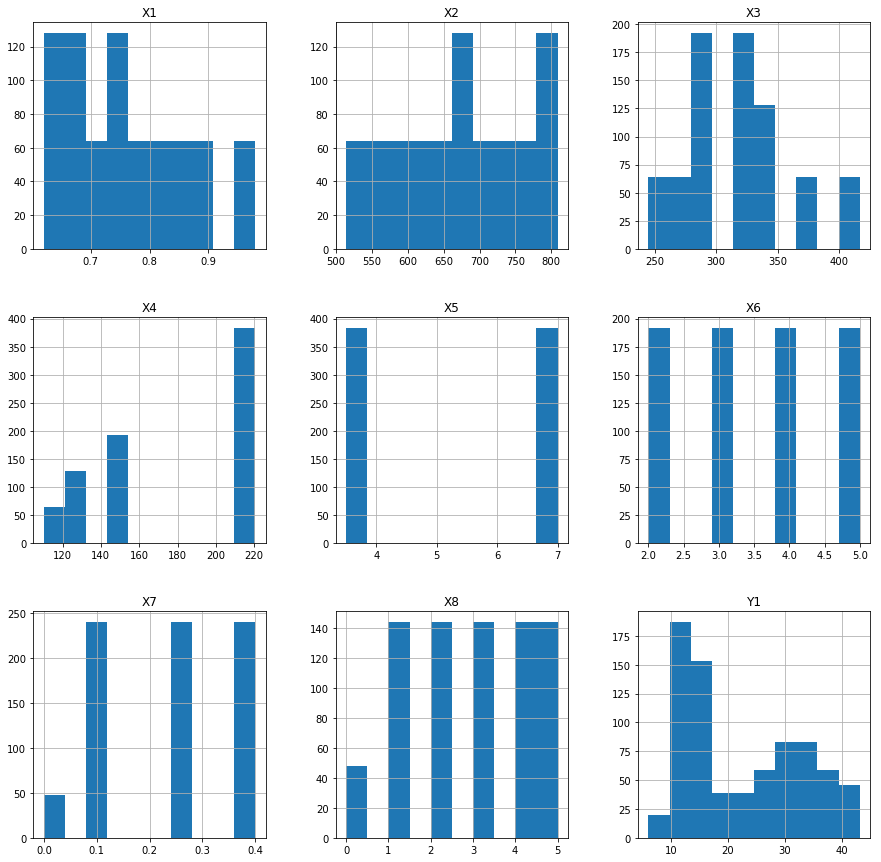

In [1]:
import pandas as pd  #importing libraries
import statistics as sa
import matplotlib.pyplot as plt
df = pd.read_csv('Energy.csv')
X1 = df[df.columns[0]]; X2 = df[df.columns[1]]; X3 = df[df.columns[2]]; X4 = df[df.columns[3]]; X5 = df[df.columns[4]]; X6 = df[df.columns[5]]; X7 = df[df.columns[6]]; X8 = df[df.columns[7]]; Y1 = df[df.columns[8]]
print(type(X1)); print(type(X2)); print(type(X3)); print(type(X4)); print(type(X5)); print(type(X6)); print(type(X7)); print(type(X8)); print(type(Y1))
print(min(X1)); print(min(X2)); print(min(X3)); print(min(X4)); print(min(X5)); print(min(X6)); print(min(X7)); print(min(X8)); print(min(Y1))
print(max(X1)); print(max(X2)); print(max(X3)); print(max(X4)); print(max(X5)); print(max(X6)); print(max(X7)); print(max(X8)); print(max(Y1))
print(sa.mean(X1)); print(sa.mean(X2)); print(sa.mean(X3)); print(sa.mean(X4)); print(sa.mean(X5)); print(sa.mean(X6)); print(sa.mean(X7)); print(sa.mean(X8)); print(sa.mean(Y1))
df.hist(figsize = (15, 15))  #ploting the graph
plt.show()

 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q2.1: Train a linear regression model on 85 percent of the given dataset, what is the intercept value and coefficient values.__



In [2]:
from sklearn.model_selection import train_test_split   
X=df.iloc[:,:-1]
Y=df['Y1']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=100) #spliting the dataset fot 85% model.

from sklearn import linear_model
LinearRegressionModel = linear_model.LinearRegression()
LinearRegressionModel.fit(x_train, y_train)                        #training the model
training_accuracy=LinearRegressionModel.score(x_train,y_train)
Predicted_Train = LinearRegressionModel.predict(x_train)
Predicted_Test = LinearRegressionModel.predict(x_test)
print ('Training Accuracy:',training_accuracy)
print("Coefficient: ", LinearRegressionModel.coef_)
print("Intercept: ",LinearRegressionModel.intercept_)

Training Accuracy: 0.916588779877
Coefficient:  [ -6.24938187e+01   1.14351200e+12  -1.14351200e+12  -2.28702401e+12
   4.32184148e+00   1.94553204e-02   2.00676946e+01   2.36007105e-01]
Intercept:  77.891702454



#### Q.2.2: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 15 percent of unseen data (test error) __ 



In [3]:
import numpy as np   #finding the rms
print('Root Mean Square error of training data is:', (np.mean((Predicted_Train-y_train)**2)**0.5))
print('Root Mean Square error of test data is:', (np.mean((Predicted_Test-y_test)**2)**0.5))

Root Mean Square error of training data is: 2.935511725827049
Root Mean Square error of test data is: 2.885331133638932



__ Q2.3: Lets us see the effect of amount of data on the performance of prediction model.Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data   is the same as above for  all  these cases.__  

Plot error rates vs number of training examples.Comment on the relationshipyou observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

Training Error for 100: 2.6267190901221977
Testing Error for 100: 8.860426027042344
Training Error 200: 2.616673699578887
Testing Error 200: 8.776974102695892
Training Error 300: 2.6862184194651593
Testing Error 300: 5.639327263386427
Training Error 400: 2.90116271310451
Testing Error 400: 3.373523611194805
Training Error 500: 2.9601916594713398
Testing Error 500: 3.075655371771144
Training Error All: 2.9035828154200867
Testing Error All: 2.8315174872916344


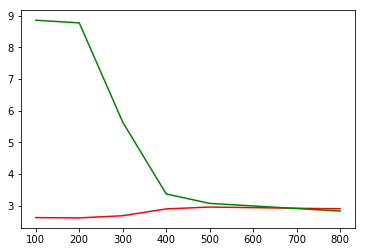

In [4]:
x_100 = df.iloc[:101, :-1]     #100 training data
y_100 = Y[:101]
lm = linear_model.LinearRegression()
lm.fit(x_100, y_100)
training_accuracy_100=lm.score(x_100,y_100)
Predicted_Train_100 = lm.predict(x_100)
Predicted_Test_100 = lm.predict(x_test)
print('Training Error for 100:', (np.mean((Predicted_Train_100-y_100)**2)**0.5))
print('Testing Error for 100:', (np.mean((Predicted_Test_100-y_test)**2)**0.5))
TRE_100 = (np.mean((Predicted_Train_100-y_100)**2)**0.5)
TEE_100 = (np.mean((Predicted_Test_100-y_test)**2)**0.5)

x_200 = df.iloc[:201,:-1]            #200 Training data
y_200 = Y[:201]
lm200 = linear_model.LinearRegression()
lm200.fit(x_200, y_200)
training_accuracy_200 = lm200.score(x_200,y_200)
Predicted_Train_200 = lm200.predict(x_200)
Predicted_Test_200 = lm200.predict(x_test)
print('Training Error 200:', (np.mean((Predicted_Train_200-y_200)**2)**0.5))
print('Testing Error 200:', (np.mean((Predicted_Test_200-y_test)**2)**0.5))
TRE_200 = (np.mean((Predicted_Train_200-y_200)**2)**0.5)
TEE_200 = (np.mean((Predicted_Test_200-y_test)**2)**0.5)

x_300 = df.iloc[:301,:-1]           #300 Training data
y_300 = Y[:301]
lm300 = linear_model.LinearRegression()
lm300.fit(x_300, y_300)
training_accuracy_300 = lm300.score(x_300,y_300)
Predicted_Train_300 = lm300.predict(x_300)
Predicted_Test_300 = lm300.predict(x_test)
print('Training Error 300:', (np.mean((Predicted_Train_300-y_300)**2)**0.5))
print('Testing Error 300:', (np.mean((Predicted_Test_300-y_test)**2)**0.5))
TRE_300 = (np.mean((Predicted_Train_300-y_300)**2)**0.5)
TEE_300 = (np.mean((Predicted_Test_300-y_test)**2)**0.5)

x_400 = df.iloc[:401,:-1]         #400 Training Data
y_400 = Y[:401]
lm400 = linear_model.LinearRegression()
lm400.fit(x_400, y_400)
training_accuracy_400=lm400.score(x_400,y_400)
Predicted_Train_400 = lm400.predict(x_400)
Predicted_Test_400 = lm400.predict(x_test)
print('Training Error 400:', (np.mean((Predicted_Train_400-y_400)**2)**0.5))
print('Testing Error 400:', (np.mean((Predicted_Test_400-y_test)**2)**0.5))
TRE_400 = (np.mean((Predicted_Train_400-y_400)**2)**0.5)
TEE_400 = (np.mean((Predicted_Test_400-y_test)**2)**0.5)

x_500 = df.iloc[:500,:-1]             #500 Training data
y_500 = Y[:500]
lm500 = linear_model.LinearRegression()
lm500.fit(x_500, y_500)
training_accuracy_500=lm500.score(x_500,y_500)
Predicted_Train_500 = lm500.predict(x_500)
Predicted_Test_500 = lm500.predict(x_test)
print('Training Error 500:', (np.mean((Predicted_Train_500-y_500)**2)**0.5))
print('Testing Error 500:', (np.mean((Predicted_Test_500-y_test)**2)**0.5))
TRE_500 = (np.mean((Predicted_Train_500-y_500)**2)**0.5)
TEE_500 = (np.mean((Predicted_Test_500-y_test)**2)**0.5)

x_all = X
y_all = Y
lmall = linear_model.LinearRegression()          #all data
lmall.fit(x_all, y_all)
training_accuracy_all= lmall.score(x_all,y_all)
Predicted_Train_all = lmall.predict(x_all)
Predicted_Test_all = lmall.predict(x_test)
print('Training Error All:', (np.mean((Predicted_Train_all-y_all)**2)**0.5))
print('Testing Error All:', (np.mean((Predicted_Test_all-y_test)**2)**0.5))
TRE_ALL = (np.mean((Predicted_Train_all-y_all)**2)**0.5)
TEE_ALL = (np.mean((Predicted_Test_all-y_test)**2)**0.5)



TRE = [TRE_100, TRE_200, TRE_300, TRE_400, TRE_500, TRE_ALL]
TEE = [TEE_100, TEE_200, TEE_300, TEE_400, TEE_500, TEE_ALL]
ALL = [100, 200, 300, 400, 500, 800]
plt.plot(ALL, TRE, 'r-', ALL, TEE, 'g-')
plt.show()

#Thus as a conclusion we find that more the data more accurate the results will be.


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 3.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 15),   
1: 'Medium'  (15-30),   
2: 'High'  (>30)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.15.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

df['Y2'] = pd.cut(df.Y1, [0, 15, 30, 50], include_lowest=True, labels=[0, 1, 2])   #using cut to classify the classes
X1 = df.iloc[:, :-1]
Y1 = df['Y2']
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.15, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

LogisticRegressionModel = linear_model.LogisticRegression()


print ('Training a logistic Regression Model..')
LogisticRegressionModel.fit(x_train, y_train)

training_accuracy=LogisticRegressionModel.score(x_train,y_train)
print ('Training Accuracy:',training_accuracy)

testing_accuracy=LogisticRegressionModel.score(x_test, y_test)
print('Testing Accuracy:', testing_accuracy)

Y_Predicted = LogisticRegressionModel.predict(x_test)
confusion = confusion_matrix(y_test, Y_Predicted)
print(confusion)


Number of samples in training data: 652
Number of samples in validation data: 116
Training a logistic Regression Model..
Training Accuracy: 0.975460122699
Testing Accuracy: 0.974137931034
[[40  0  0]
 [ 3 47  0]
 [ 0  0 26]]


__ Q3.2: One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. This makes training less sensitive to the scale of features . Scaling is important in algorithms that use distance based classification, SVM or K means or involve gradient descent optimization.If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

Training a logistic Regression Model..
Training Accuracy: 0.682515337423
Testing Accuracy: 0.672413793103


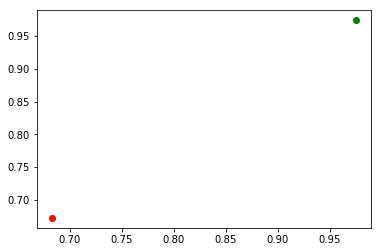

In [6]:
from sklearn import preprocessing                   #training logistic regression model

X_train_minmax = preprocessing.normalize(x_train, norm='l2')
X_test_minmax = preprocessing.normalize(x_test, norm='l2')

print ('Training a logistic Regression Model..')
LogisticRegressionModel.fit(X_train_minmax, y_train)

training_accuracy_FS=LogisticRegressionModel.score(X_train_minmax,y_train)
print ('Training Accuracy:',training_accuracy_FS)

testing_accuracy_FS=LogisticRegressionModel.score(X_test_minmax, y_test)
print('Testing Accuracy:', testing_accuracy_FS)

plt.plot(training_accuracy_FS, testing_accuracy_FS, 'ro', training_accuracy, testing_accuracy, 'go')
plt.show()

#Thus data with the original data without feature scaling is more accurate

## Part 2



__ 1. Read __`diabetesdata.csv`__ file into a pandas dataframe. Analyze the data features, check for NaN values. 
About the data: __

1. __TimesPregnant__: Number of times pregnant 
2. __glucoseLevel__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. __BP__: Diastolic blood pressure (mm Hg)  
5. __insulin__: 2-Hour serum insulin (mu U/ml) 
6. __BMI__: Body mass index (weight in kg/(height in m)^2) 
7. __pedigree__: Diabetes pedigree function 
8. __Age__: Age (years) 
9. __IsDiabetic__: 0 if not diabetic or 1 if diabetic) 

__ 2. Preprocess data to replace NaN values in a feature(if any) using mean of the feature.  
Train  logistic regression, SVM, perceptron, kNN, xgboost and random forest models using this preprocessed data with 20% test split.Report training and test accuracies.__







In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier


file_path='diabetesdata.csv'
dataframe=pd.read_csv(file_path)
dataframe.head()
dataframe= shuffle(dataframe).reset_index(drop=True)
print('Number of NaNs in the dataframe:\n',dataframe.isnull().sum())
dataframe.head()
Glucose_mean = dataframe['glucoseLevel'].mean()
Age_mean = dataframe['Age'].mean()
dataframe.loc[dataframe.glucoseLevel.isnull(),'glucoseLevel'] = Glucose_mean
dataframe.loc[dataframe.Age.isnull(),'Age'] = Age_mean
print('Number of NaNs in the dataframe:\n',dataframe.isnull().sum())
#X_Class = dataframe[:, :-1]
#Y_class = dataframe['IsDiabetic']
X_Class= dataframe.drop("IsDiabetic", axis=1) # Training & Validation data
Y_Class = dataframe["IsDiabetic"] # Response / Target Variable

x_train, x_test, y_train, y_test = train_test_split(X_Class, Y_Class, test_size=0.2, random_state=100)

logreg = LogisticRegression() # instantiate
logreg.fit(x_train, y_train) # fit
Y_pred = logreg.predict(x_test) # predict
acc_log = sum(Y_pred == y_test)/len(y_test)*100
print('Logistic Regression accuracy:', str(round(acc_log,2)),'%')

svc = SVC()
svc.fit(x_train, y_train)
acc_svc = svc.score(x_test, y_test)
print('SVM accuracy:', (acc_svc)*100, "%")

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
acc_perceptron = perceptron.score(x_test, y_test)
print("Perceptron accuracy: ", (acc_perceptron)*100, '%')

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
acc_knn = knn.score(x_test, y_test)
print('KNN accuracy:',(acc_knn)*100, '%')

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)
acc_random_forest = random_forest.score(x_test, y_test)
print('Random Forest Method accuracy: ', (acc_random_forest)*100, ('%'))

Number of NaNs in the dataframe:
 TimesPregnant     0
glucoseLevel     34
BP                0
insulin           0
BMI               0
Pedigree          0
Age              33
IsDiabetic        0
dtype: int64
Number of NaNs in the dataframe:
 TimesPregnant    0
glucoseLevel     0
BP               0
insulin          0
BMI              0
Pedigree         0
Age              0
IsDiabetic       0
dtype: int64
Logistic Regression accuracy: 80.52 %
SVM accuracy: 69.4805194805 %
Perceptron accuracy:  70.7792207792 %
KNN accuracy: 70.1298701299 %


C:\Users\ANITH\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Random Forest Method accuracy:  81.8181818182 %




__3. What is the  ratio of diabetic persons in 3 equirange bands of 'BMI' and 'Pedigree' in the provided dataset.__

 __Convert these features - 'BP','insulin','BMI' and 'Pedigree'   into categorical values by mapping different bands of values of these features to integers 0,1,2.__  
 
HINT: USE pd.cut with bin=3 to create 3 bins






In [12]:
dia=pd.read_csv("diabetesdata.csv")
dia['BMIBand'] = pd.cut(dia['BMI'], 3)     #3 equirange division
dia['PedigreeBand']=pd.cut(dia['Pedigree'],3)     

count_dia=dia['IsDiabetic'].sum()
print(dia[['BMIBand','IsDiabetic']].groupby('BMIBand').sum().divide(count_dia))

                                           
print(dia[['PedigreeBand', 'IsDiabetic']].groupby('PedigreeBand')\
                    .sum().divide(count_dia))                                           
    
    
dia['BP']=pd.cut(dia['BP'],3,labels=[0,1,2])    #assigning the labels
dia['insulin']=pd.cut(dia['insulin'],3,labels=[0,1,2])
dia['BMI']=pd.cut(dia['BMI'],3,labels=[0,1,2])
dia['Pedigree']=pd.cut(dia['Pedigree'],3,labels=[0,1,2])


dia=dia.drop('BMIBand',axis=1)
dia=dia.drop('PedigreeBand',axis=1)

dia.head()    

                   IsDiabetic
BMIBand                      
(-0.0671, 22.367]    0.007463
(22.367, 44.733]     0.910448
(44.733, 67.1]       0.082090
                 IsDiabetic
PedigreeBand               
(0.0757, 0.859]    0.835821
(0.859, 1.639]     0.149254
(1.639, 2.42]      0.014925


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.0,1,0,1,0,50.0,1
1,1,NaN,1,0,1,0,31.0,0
2,8,183.0,1,0,1,0,NaN,1
3,1,NaN,1,0,1,0,21.0,0
4,0,137.0,0,0,1,2,33.0,1



__4. Now consider the original dataset again, instead of generalizing the NAN values with the mean of the feature we will try assigning values to NANs based on some hypothesis. For example for age we assume that the relation between BMI and BP of people is a reflection of the age group.We can have 9 types of BMI and BP relations and our aim is to find the median age of each of that group:__

Your Age guess matrix will look like this:  

| BMI | 0       | 1      | 2  |
|-----|-------------|------------- |----- |
| BP  |             |              |      |
| 0   | a00         | a01          | a02  |
| 1   | a10         | a11          | a12  |
| 2   | a20         | a21          |  a22 |


__Create a guess_matrix  for NaN values of *'Age'* ( using 'BMI' and 'BP')  and  *'glucoseLevel'*  (using 'BP' and 'Pedigree') for the given dataset and assign values accordingly to the NaNs in 'Age' or *'glucoseLevel'* .__


Refer to how we guessed age in the titanic notebook in the class.



In [14]:
guessing = np.zeros((3,3), dtype=int)      #guessing the values
guessing_gl=np.zeros((3,3), dtype=int)

for n in range(0,3):
    for m in range(0,3):
        guess_age_df=dia[(dia['BMI']==n) & (dia['BP']==m)]['Age'].dropna()
        guess_glulevel_df=dia[(dia['BP']==n) & (dia['Pedigree']==m)]['glucoseLevel'].dropna()
        
        age_guess = guess_age_df.median()
        glucose_guess = guess_glulevel_df.median()
        
        guessing[n, m]=int(age_guess)
        guessing_gl[n, m]=int(glucose_guess)
        
print("Guess Age Table:\n",guessing)
print("\nGuess Glucose Level Table:\n",guessing_gl)

for i in range(0,3):
    for j in range(0,3):
        dia.loc[(dia.Age.isnull()) & (dia.BMI == i) & (dia.BP==j),'Age']=guessing[i,j]
        dia.loc[(dia.glucoseLevel.isnull()) & (dia.BP == i)\
                    & (dia.Pedigree==j), 'glucoseLevel']=guessing_gl[i,j]
        
dia['Age']=dia['Age'].astype(int)
dia['glucoseLevel']=dia['glucoseLevel'].astype(int)
dia.head(10)
    

Guess Age Table:
 [[24 25 55]
 [29 29 37]
 [33 32 31]]

Guess Glucose Level Table:
 [[115 127 137]
 [112 115 149]
 [133 129 159]]


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148,1,0,1,0,50,1
1,1,112,1,0,1,0,31,0
2,8,183,1,0,1,0,29,1
3,1,112,1,0,1,0,21,0
4,0,137,0,0,1,2,33,1
5,5,116,1,0,1,0,30,0
6,3,78,1,0,1,0,26,1
7,10,115,0,0,1,0,29,0
8,2,197,1,1,1,0,53,1
9,8,133,2,0,0,0,54,1




__5. Now, convert 'glucoseLevel' and 'Age' features also to categorical variables of 5 categories each.__

__Use this dataset (with all features in categorical form) to train perceptron, logistic regression and random forest models using 20% test split. Report training and test accuracies.__







In [18]:
dia['Age']=pd.cut(dia['Age'],5, labels=[0,1,2,3,4])   
dia['glucoseLevel']=pd.cut(dia['glucoseLevel'],5, labels=[0,1,2,3,4])

print(dia.head())

X1_train, X1_test, Y1_train, Y1_test = train_test_split(dia.drop('IsDiabetic',axis=1),dia.IsDiabetic, test_size=0.2)

per=Perceptron()
per.fit(X1_train,Y1_train)
percep_pred=per.predict(X1_test)
percep_train=round(per.score(X1_train,Y1_train)*100,2)
percep_test=round(per.score(X1_test,Y1_test)*100,2)
print("Training Accuracy for Perceptron Model: ",percep_train)
print("Test Accuracy for Perceptron Model: ",percep_test)

logreg=LogisticRegression()
logreg.fit(X1_train,Y1_train)
logreg_dia_pred=logreg.predict(X1_test)
logreg_train=round(logreg.score(X1_train, Y1_train)*100,2)
logreg_test=round(logreg.score(X1_test, Y1_test)*100,2)
print("Traing Accuracy for Logistic Regression: ",logreg_train)
print("Test Accuracy for Logistic Regression: ",logreg_test)

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X1_train, Y1_train)
random_pred = random_forest.predict(X1_test)
acctrain_random = round(random_forest.score(X1_train, Y1_train) * 100, 2)
acctest_random = round(random_forest.score(X1_test, Y1_test) * 100, 2)
print("Train Accuracy for Random Forest: ",acctrain_random)        #accuracues after training
print("Test Accuracy for Random Forest: ",acctest_random)

   TimesPregnant glucoseLevel BP insulin BMI Pedigree Age  IsDiabetic
0              6            3  1       0   1        0   2           1
1              1            2  1       0   1        0   0           0
2              8            4  1       0   1        0   0           1
3              1            2  1       0   1        0   0           0
4              0            3  0       0   1        2   0           1
Training Accuracy for Perceptron Model:  67.75
Test Accuracy for Perceptron Model:  60.39
Traing Accuracy for Logistic Regression:  76.55
Test Accuracy for Logistic Regression:  76.62


C:\Users\ANITH\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Train Accuracy for Random Forest:  90.39
Test Accuracy for Random Forest:  70.78


### Part 3

1. __Derive the expression for the optimal parameters in the linear regression equation, i.e. solve the normal equation for Ordinary Least Squares for the case of Simple Linear Regression, when we only have one input and one output__

Given a set of _n_ points $(X_i,Y_i)$ where $Yi$ is dependent on $Xi$ by a linear relation,  find the best-fit line,$$Z_i = {aX_i + b}$$  that minimizes the __sum of squared errors in Y__,i.e: $$minimize \sum_{i}{(Y_i- Z_i)^2}$$
__i. __ Show that $$ intercept \quad b = \overline{Y}-  a.\overline{X}\quad  and   \quad slope \quad a= \frac{\sum_{i}(X_i- \overline{X})(Y_i- \overline{Y})}{ \sum_{i}(X_i- \overline{X})^2}$$


 where $\overline{X}$ and  $\overline{Y}$ are the averages of the X values and the Y values, respectively.
 
__ ii. __Show that slope _a_ can be written as $ a = r.(S_y /S_x)$ where $S_y$  = the standard deviation of the Y values and $S_x$= the standard deviation of the X values and _r_ is the correlation coefficient.

##### Please try to write a nice LateXed version of your answer, and do the derivations of the expressions as nicely as possible


_____

__The derivation for the first question is as follows:__

__i.__ $$Z_i = {aX_i + b}$$

We have to $$Q = minimize \sum_{i}{(Y_i-Z_i)^2}$$

Thus finding the first order derivative of Z_i w.r.t a and b, then equating it to zero we get:
$$\frac{dQ}{da} = 0$$
$$\frac{dQ}{db} = 0$$
$$\frac{dQ}{da} = 2\sum_{i}{(Y_i-aX_i+b)(-X_i)}$$  
$$\frac{dQ}{db} = 2\sum_{i}{(Y_i-aX_i+b)(-1)}$$
Thus we get two equations for further solution

Also equating this equaitons to zero we get
$$\sum_{i}{(Y_i-aX_i+b)(-X_i)} = 0$$
$$\sum_{i}{(Y_i-aX_i+b)(-1)} = 0$$
Here we can also consider the two solutions:
i.e.
$$\sum_{i}{X_i}=n\overline{X}$$ 
$$\sum_{i}{Y_i}=n\overline{Y}$$
Now solving the equations using above expression we get:
$$\sum_{i}{(Y_i-aX_i+b)(-1)} = 0$$
$$\sum_{i}{Y_i}-a\sum_{i}{X_i}+\sum_{i}{b} = 0$$
Using the above expression i.e. mean relation of the Xi and Yi
$$n\overline{Y}-an\overline{X}+nb = 0$$
Thus arranging the above equation we get
 $$ intercept \quad ineb = \overline{Y}-  a.\overline{X}\quad $$
 
 Now finding the solution for the slope we consider other equations i.e.
 $$\sum_{i}{(X_i-\overline{X})(Y_i-\overline{Y})} = \sum_{i}{(Y_i(X_i-\overline{X})) = \sum_{i}{(X_i(Y_i-\overline{Y}))}}$$
 
 Now solving
 $$\sum_{i}{(Y_i-aX_i+b)(-X_i)} = 0$$
 $$\sum_{i}{(Y_i-aX_i+b)(X_i)} = 0$$
 $$\sum_{i}{(Y_iX_i-a(X_i)^2+bX_i)} = 0$$
 $$\sum_{i}{Y_iX_i}-\sum_{i}{a(x_i)^2}+\sum_{i}{bX_i} = 0$$
 $$\sum_{i}{Y_iX_i} = \sum_{i}{a(x_i)^2}+\sum_{i}{bX_i}$$
 Now using the value of intercept i.e. b in the equation we get
 $$\sum_{i}{Y_iX_i} = \sum_{i}{a(x_i)^2}+\sum_{i}{(\overline{Y}-a.\overline{X})X_i}$$
 $$\sum_{i}{Y_iX_i} = \sum_{i}{a(x_i)^2}+(\overline{Y}-a.\overline{X})n\overline{X}$$
 $$\sum_{i}{Y_iX_i} - n\overline{X}\overline{Y} = a(\sum_{i}{(X_i)^2-n(X)^2})$$
 $$a = \frac{\sum_{i}{X_iY_i-\overline{X}Y_i}}{\sum_{i}{(X)^2-\overline{X}X_i}}$$
 $$a = \frac{\sum_{i}{(X_i-\overline{X})(Y_i-\overline{Y})}}{\sum_{i}{(X_i-\overline{X})^2}}$$
 
 __Now Solving for part ii.__
 From the above equation we know that slope is a i.e
$$a = \frac{\sum_{i}{(X_i-\overline{X})(Y_i-\overline{Y})}}{\sum_{i}{(X_i-\overline{X})^2}}$$
Which is equaivalent to 
$$a = \frac{Cov(X_i, Y_i)}{Var(X_i)}$$
$$Cov(X_i, Y_i) = rS(X_i)S(Y_i)$$
$$Var(X_i) = (S(X_i))^2$$
Thus by substituting the value of the above equations in a we get
$$a = \frac{rS(X_i)S(Y_i)}{(S(X_i))^2}$$
$$a = \frac{rS(Y_i)}{S(X_i)}$$

# Two Extra Credit Points: Fun with Webscraping & Text manipulation
### (Mandatory for Grad students!)

<div class='alert alert-info'> `NOTE:` **If you are a Graduate Section student (enrolled in 290), the Extra Credit Questions are mandatory.**</div>

## 1. Statistics in Presidential Debates

Your first task is to scrape Presidential Debates from the Commission of Presidential Debates website: http://www.debates.org/index.php?page=debate-transcripts.

To do this, you are not allowed to manually look up the URLs that you need, instead you have to scrape them. The root url to be scraped is the one listed above, namely: http://www.debates.org/index.php?page=debate-transcripts


1. By using `requests` and `BeautifulSoup` find all the links / URLs on the website that links to transcriptions of **First Presidential Debates** from the years [2012, 2008, 2004, 2000, 1996, 1988, 1984, 1976, 1960]. In total you should find 9 links / URLs tat fulfill this criteria.
2. When you have a list of the URLs your task is to create a Data Frame with some statistics (see example of output below):
    1. Scrape the title of each link and use that as the column name in your Data Frame. 
    2. Count how long the transcript of the debate is (as in the number of characters in transcription string). Feel free to include `\` characters in your count, but remove any breakline characters, i.e. `\n`. You will get credit if your count is +/- 10% from our result.
    3. Count how many times the word **war** was used in the different debates. Note that you have to convert the text in a smart way (to not count the word **warranty** for example, but counting **war.**, **war!**, **war,** or **War** etc.
    4. Also scrape the most common used word in the debate, and write how many times it was used. Note that you have to use the same strategy as in 3 in order to do this.
    
**Tips:**

___

In order to solve question 3 and 4 above it can be useful to work with Regular Expressions and explore methods on strings like `.strip(), .replace(), .find(), .count(), .lower()` etc. Both are very powerful tools to do string processing in Python. To count common words for example I used a `Counter` object and a Regular expression pattern for only words, see example:

```python
    from collections import Counter
    import re

    counts = Counter(re.findall(r"[\w']+", text.lower()))
```

Read more about Regular Expressions here: https://docs.python.org/3/howto/regex.html
    
    
**Example output of all of the answers to EC Question 1:**


![pres_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/president_stats.png)




----

.




In [19]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) 
from __future__ import division, print_function
import requests # The requests library is an HTTP library for getting content and posting etc.
import bs4 as bs # BeautifulSoup4 is a Python library
source = requests.get("http://www.debates.org/index.php?page=debate-transcripts",)
soup = bs.BeautifulSoup(source.content, features='html.parser') 
all_links = soup.find_all("a")
l1=[]
row0 = []
for link in all_links:
    if "First" in str(link.string):
        if not ("1992" or "1980") in str(link.string):
            if not "half" in str(link.string):
                l1.append(str(link.get("href")))
                row0.append(str(link.string))
row0
import re
l2 = []
for i in range (0,9):
    s=""
    e=0
    source = requests.get(l1[i])
    soup = bs.BeautifulSoup(source.content, features='html.parser') 
    soup = soup.find("div", {"id": "content-sm"})
    s=str(soup)
    s = re.sub('<[^>]+>', '', s)
    s=s.replace("\n","")
    l2.append(s)
row1 = []
for i in range (0,9):
    row1.append(len(l2[i]))
row1
row2 = []
for i in range (0,9):
    #temp = l2[i][:] 
    l2[i] = l2[i].replace("\'"," ")
    l2[i] = l2[i].replace(","," ")
    l2[i] = l2[i].replace("."," ")
    l2[i] = l2[i].replace("!"," ")
    l2[i] = l2[i].replace("War","war")
    l2[i] = l2[i].replace("Wars","wars")
    row2.append(int(l2[i].count("war ")) + int(l2[i].count("wars")))
row2
row3 = []
row4 = []
for j in range (0,9):
    l = l2[j].split()
    for i in range (0,len(l)):
        l[i] = l[i].lower()
    wordfreq = []
    for w in l:
        wordfreq.append(l.count(w))
    row4.append(max(wordfreq))
    row3.append(l[wordfreq.index(max(wordfreq))])
print(row3,row4)
col = []
index = ['Debate char length', 'War_count', 'Most_common_w', 'Most_common_w_count']
df = pd.DataFrame([],index=index)
for i in range(0,9):
    col.append([row1[i],row2[i],row3[i],row4[i]])
    df[row0[i]] = col[i]
df
    

['the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the'] [757, 1468, 852, 916, 875, 798, 844, 855, 778]


,"October 3, 2012: The First Obama-Romney Presidential Debate","September 26, 2008: The First McCain-Obama Presidential Debate","September 30, 2004: The First Bush-Kerry Presidential Debate","October 3, 2000: The First Gore-Bush Presidential Debate","October 6, 1996: The First Clinton-Dole Presidential Debate","September 25, 1988: The First Bush-Dukakis Presidential Debate","October 7, 1984: The First Reagan-Mondale Presidential Debate","September 23, 1976: The First Carter-Ford Presidential Debate","September 26, 1960: The First Kennedy-Nixon Presidential Debate"
Debate char length,94627,182422,82721,91066,93094,87494,86687,80740,60937
War_count,5,48,63,11,15,13,3,7,3
Most_common_w,the,the,the,the,the,the,the,the,the
Most_common_w_count,757,1468,852,916,875,798,844,855,778


    
## 2. Download and read in specific line from many data sets

Scrape the first 27 data sets from this URL http://people.sc.fsu.edu/~jburkardt/datasets/regression/ (i.e.`x01.txt` - `x27.txt`). Then, save the 5th line in each data set, this should be the name of the data set author (get rid of the `#` symbol, the white spaces and the comma at the end). 

Count how many times (with a Python function) each author is the reference for one of the 27 data sets. Showcase your results, sorted, with the most common author name first and how many times he appeared in data sets. Use a Pandas DataFrame to show your results, see example.

**Example output of the answer EC Question 2:**

![author_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/data_authors.png)


In [20]:
source = requests.get("http://people.sc.fsu.edu/~jburkardt/datasets/regression/",)
soup = bs.BeautifulSoup(source.content, features='html.parser') 
all_links = soup.find_all("a")
row0 = []
ran = 0
for link in all_links:
    if "txt" in str(link.string):
        ran = ran + 1
        if ran <28:
            row0.append("http://people.sc.fsu.edu/~jburkardt/datasets/regression/" + str(link.get("href")))
row0

row1 = []
for i in range (0,27):    
    source = requests.get(row0[i])
    soup = bs.BeautifulSoup(source.content, features='html.parser')
    soup = str(soup)
    soup = soup.replace(" ","_")
    soup = soup.replace("\n"," ")
    l = soup.split()
    l[4] = l[4].replace("#____","")
    l[4] = l[4].replace(",","")
    l[4] = l[4].replace("_"," ")
    row1.append(l[4])
row1

b = set(row1)
b = list(b)
b

row2 = []
for i in range(0,len(b)):
    ctr = 0
    for j in range(0,len(row1)):
        if(b[i]==row1[j]):
            ctr += 1
    row2.append(ctr)
row2
df = pd.DataFrame()
df["Authors"] = b
df["Counts"] = row2
df
df.sort_values("Counts",ascending=False)

,Authors,Counts
5,Helmut Spaeth,16
3,S Chatterjee B Price,3
0,D G Kleinbaum and L L Kupper,2
1,R J Freund and P D Minton,2
2,S C Narula J F Wellington,2
4,K A Brownlee,1
6,S Chatterjee and B Price,1
